<a href="https://colab.research.google.com/github/RoshanJamthe/Kaggle-competition-Titanic-disaster-survival-prediction/blob/main/Copy_of_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

###The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

##Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# <b><u>Data Wrangling

## Dataset Loading

In [65]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [66]:
# This helps to show all the columns
pd.set_option('display.max_columns', 200)

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Load the train dataset
df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/train.csv")

In [69]:
# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/test.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
# Join the train and test dataset together, so we can perform same operations
df = pd.concat([df,test_df])

In [73]:
# View the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



> There are object type features they need to be converted into the numerical format

>There are missing values so those needs to be treated as well.

> The dependent feature 'Survived' is in required data type format



In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
'Braund, Mr. Owen Harris'.split(',')

['Braund', ' Mr. Owen Harris']

In [76]:
def get_prefix(row):
  temp = row.split(',')
  temp2 = temp[1].split()  
  return temp2[0]

df['prefix'] = df['Name'].apply(get_prefix)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [77]:
df['prefix'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'], dtype=object)

In [78]:
df.groupby('prefix').agg({'Age':'min','Age':'mean'})

,Age
prefix,
Capt.,70.000000
Col.,54.000000
Don.,40.000000
Dona.,39.000000
Dr.,43.571429
Jonkheer.,38.000000
Lady.,48.000000
Major.,48.500000
Master.,5.482642


In [79]:
# is_minor transformation
df['is_minor1'] = df['Age'].apply(lambda x: 1 if x<16 else 0)
df['is_minor2'] = df['prefix'].apply(lambda x: 1 if x=='Master' else 0)
df['is_minor'] = df['is_minor1'] + df['is_minor2']

In [80]:
df[df['is_minor']==0]['Survived'].value_counts()

0.0    515
1.0    293
Name: Survived, dtype: int64

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,is_minor1,is_minor2,is_minor
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,0


In [82]:
def get_surname(row):
  temp = row.split(',')
  return temp[0]

df['surname'] = df['Name'].apply(get_surname)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,is_minor1,is_minor2,is_minor,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,0,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,0,0,0,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,0,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,0,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,0,Allen


In [83]:
len(df['surname'].unique())

875

In [84]:
df = df.drop(['PassengerId','Age','Name','Ticket','Cabin','Embarked','is_minor1','is_minor2'],axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,prefix,is_minor,surname
0,0.0,3,male,1,0,7.2500,Mr.,0,Braund
1,1.0,1,female,1,0,71.2833,Mrs.,0,Cumings
2,1.0,3,female,0,0,7.9250,Miss.,0,Heikkinen
3,1.0,1,female,1,0,53.1000,Mrs.,0,Futrelle
4,0.0,3,male,0,0,8.0500,Mr.,0,Allen


## Feature engineering 

In [85]:
# View the dataset
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,prefix,is_minor,surname
0,0.0,3,male,1,0,7.2500,Mr.,0,Braund
1,1.0,1,female,1,0,71.2833,Mrs.,0,Cumings
2,1.0,3,female,0,0,7.9250,Miss.,0,Heikkinen
3,1.0,1,female,1,0,53.1000,Mrs.,0,Futrelle
4,0.0,3,male,0,0,8.0500,Mr.,0,Allen


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   prefix    1309 non-null   object 
 7   is_minor  1309 non-null   int64  
 8   surname   1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [64]:
df.shape[0], len(df['surname'].unique())

(1309, 875)

### Dummy variables

In [87]:
# Create dummies
df = pd.get_dummies(df, columns=['Sex','prefix', 'surname'])

In [89]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,is_minor,Sex_female,Sex_male,prefix_Capt.,prefix_Col.,prefix_Don.,prefix_Dona.,prefix_Dr.,prefix_Jonkheer.,prefix_Lady.,prefix_Major.,prefix_Master.,prefix_Miss.,prefix_Mlle.,prefix_Mme.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Rev.,prefix_Sir.,prefix_the,surname_Abbing,surname_Abbott,surname_Abelseth,surname_Abelson,surname_Abrahamsson,surname_Abrahim,surname_Adahl,surname_Adams,surname_Ahlin,surname_Aks,surname_Albimona,surname_Aldworth,surname_Alexander,surname_Alhomaki,surname_Ali,surname_Allen,surname_Allison,surname_Allum,surname_Andersen,surname_Andersen-Jensen,surname_Anderson,surname_Andersson,surname_Andreasson,surname_Andrew,surname_Andrews,surname_Angheloff,surname_Angle,surname_Appleton,surname_Arnold-Franchi,surname_Aronsson,surname_Artagaveytia,surname_Ashby,surname_Asim,surname_Asplund,surname_Assaf,surname_Assaf Khalil,surname_Assam,surname_Astor,surname_Attalah,surname_Aubart,surname_Augustsson,surname_Ayoub,surname_Baccos,surname_Backstrom,surname_Baclini,surname_Badman,surname_Badt,surname_Bailey,surname_Baimbrigge,surname_Balkic,surname_Ball,surname_Banfield,surname_Barah,surname_Barbara,surname_Barber,surname_Barkworth,surname_Barry,surname_Barton,surname_Bateman,surname_Baumann,surname_Baxter,surname_Bazzani,surname_Beane,surname_Beattie,surname_Beauchamp,surname_Beavan,surname_Becker,surname_Beckwith,surname_Beesley,surname_Behr,surname_Bengtsson,surname_Bentham,surname_Berglund,surname_Berriman,...,surname_Sunderland,surname_Sundman,surname_Sutehall,surname_Sutton,surname_Svensson,surname_Swane,surname_Sweet,surname_Swift,surname_Taussig,surname_Taylor,surname_Tenglin,surname_Thayer,surname_Theobald,surname_Thomas,surname_Thomson,surname_Thorne,surname_Thorneycroft,surname_Tikkanen,surname_Tobin,surname_Todoroff,surname_Tomlin,surname_Toomey,surname_Torber,surname_Torfa,surname_Tornquist,surname_Toufik,surname_Touma,surname_Troupiansky,surname_Trout,surname_Troutt,surname_Tucker,surname_Turcin,surname_Turja,surname_Turkula,surname_Turpin,surname_Uruchurtu,surname_Van Impe,surname_Van der hoef,surname_Vande Velde,surname_Vande Walle,surname_Vanden Steen,surname_Vander Cruyssen,surname_Vander Planke,surname_Vartanian,surname_Veal,surname_Vendel,surname_Vestrom,surname_Vovk,surname_Waelens,surname_Walcroft,surname_Walker,surname_Ward,surname_Ware,surname_Warren,surname_Watson,surname_Watt,surname_Webber,surname_Weir,surname_Weisz,surname_Wells,surname_Wenzel,surname_West,surname_Whabee,surname_Wheadon,surname_Wheeler,surname_White,surname_Wick,surname_Widegren,surname_Widener,surname_Wiklund,surname_Wilhelms,surname_Wilkes,surname_Willard,surname_Willer,surname_Willey,surname_Williams,surname_Williams-Lambert,surname_Wilson,surname_Windelov,surname_Wirz,surname_Wiseman,surname_Wittevrongel,surname_Woolner,surname_Wright,surname_Yasbeck,surname_Young,surname_Youseff,surname_Yousif,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zakarian,surname_Zimmerman,surname_de Brito,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
0,0.0,3,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,3,0,0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

Great! Now we have all the data in numerical format

Next steps demands data to be in numerical format

Converting the continuous features to categorical type

In [112]:
# Impute the median() value in 'Fare', inplace of nan value
df['Fare'].fillna(8.05,inplace=True)

# <b><u>Build ML models

## Pre-processing

### Separating train and test dataset

In [113]:
# Remember how our dataframe looked like, no? Lets view it again.
df.head()

,Survived,Pclass,SibSp,Parch,Fare,is_minor,Sex_female,Sex_male,prefix_Capt.,prefix_Col.,prefix_Don.,prefix_Dona.,prefix_Dr.,prefix_Jonkheer.,prefix_Lady.,prefix_Major.,prefix_Master.,prefix_Miss.,prefix_Mlle.,prefix_Mme.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Rev.,prefix_Sir.,prefix_the,surname_Abbing,surname_Abbott,surname_Abelseth,surname_Abelson,surname_Abrahamsson,surname_Abrahim,surname_Adahl,surname_Adams,surname_Ahlin,surname_Aks,surname_Albimona,surname_Aldworth,surname_Alexander,surname_Alhomaki,surname_Ali,surname_Allen,surname_Allison,surname_Allum,surname_Andersen,surname_Andersen-Jensen,surname_Anderson,surname_Andersson,surname_Andreasson,surname_Andrew,surname_Andrews,surname_Angheloff,surname_Angle,surname_Appleton,surname_Arnold-Franchi,surname_Aronsson,surname_Artagaveytia,surname_Ashby,surname_Asim,surname_Asplund,surname_Assaf,surname_Assaf Khalil,surname_Assam,surname_Astor,surname_Attalah,surname_Aubart,surname_Augustsson,surname_Ayoub,surname_Baccos,surname_Backstrom,surname_Baclini,surname_Badman,surname_Badt,surname_Bailey,surname_Baimbrigge,surname_Balkic,surname_Ball,surname_Banfield,surname_Barah,surname_Barbara,surname_Barber,surname_Barkworth,surname_Barry,surname_Barton,surname_Bateman,surname_Baumann,surname_Baxter,surname_Bazzani,surname_Beane,surname_Beattie,surname_Beauchamp,surname_Beavan,surname_Becker,surname_Beckwith,surname_Beesley,surname_Behr,surname_Bengtsson,surname_Bentham,surname_Berglund,surname_Berriman,...,surname_Sunderland,surname_Sundman,surname_Sutehall,surname_Sutton,surname_Svensson,surname_Swane,surname_Sweet,surname_Swift,surname_Taussig,surname_Taylor,surname_Tenglin,surname_Thayer,surname_Theobald,surname_Thomas,surname_Thomson,surname_Thorne,surname_Thorneycroft,surname_Tikkanen,surname_Tobin,surname_Todoroff,surname_Tomlin,surname_Toomey,surname_Torber,surname_Torfa,surname_Tornquist,surname_Toufik,surname_Touma,surname_Troupiansky,surname_Trout,surname_Troutt,surname_Tucker,surname_Turcin,surname_Turja,surname_Turkula,surname_Turpin,surname_Uruchurtu,surname_Van Impe,surname_Van der hoef,surname_Vande Velde,surname_Vande Walle,surname_Vanden Steen,surname_Vander Cruyssen,surname_Vander Planke,surname_Vartanian,surname_Veal,surname_Vendel,surname_Vestrom,surname_Vovk,surname_Waelens,surname_Walcroft,surname_Walker,surname_Ward,surname_Ware,surname_Warren,surname_Watson,surname_Watt,surname_Webber,surname_Weir,surname_Weisz,surname_Wells,surname_Wenzel,surname_West,surname_Whabee,surname_Wheadon,surname_Wheeler,surname_White,surname_Wick,surname_Widegren,surname_Widener,surname_Wiklund,surname_Wilhelms,surname_Wilkes,surname_Willard,surname_Willer,surname_Willey,surname_Williams,surname_Williams-Lambert,surname_Wilson,surname_Windelov,surname_Wirz,surname_Wiseman,surname_Wittevrongel,surname_Woolner,surname_Wright,surname_Yasbeck,surname_Young,surname_Youseff,surname_Yousif,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zakarian,surname_Zimmerman,surname_de Brito,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
0,0.0,3,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,3,0,0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [114]:
# Import the normalizer 'MinMaxScaler'
from sklearn.preprocessing import StandardScaler

In [115]:
scalar = StandardScaler()

In [116]:
# Getting normalized X and y
X = pd.DataFrame(scalar.fit_transform(df.drop('Survived',axis=1)),columns=df.drop('Survived',axis=1).columns)

y = df['Survived']

In [117]:
# View the independent feature dataset
X.head()

,Pclass,SibSp,Parch,Fare,is_minor,Sex_female,Sex_male,prefix_Capt.,prefix_Col.,prefix_Don.,prefix_Dona.,prefix_Dr.,prefix_Jonkheer.,prefix_Lady.,prefix_Major.,prefix_Master.,prefix_Miss.,prefix_Mlle.,prefix_Mme.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Rev.,prefix_Sir.,prefix_the,surname_Abbing,surname_Abbott,surname_Abelseth,surname_Abelson,surname_Abrahamsson,surname_Abrahim,surname_Adahl,surname_Adams,surname_Ahlin,surname_Aks,surname_Albimona,surname_Aldworth,surname_Alexander,surname_Alhomaki,surname_Ali,surname_Allen,surname_Allison,surname_Allum,surname_Andersen,surname_Andersen-Jensen,surname_Anderson,surname_Andersson,surname_Andreasson,surname_Andrew,surname_Andrews,surname_Angheloff,surname_Angle,surname_Appleton,surname_Arnold-Franchi,surname_Aronsson,surname_Artagaveytia,surname_Ashby,surname_Asim,surname_Asplund,surname_Assaf,surname_Assaf Khalil,surname_Assam,surname_Astor,surname_Attalah,surname_Aubart,surname_Augustsson,surname_Ayoub,surname_Baccos,surname_Backstrom,surname_Baclini,surname_Badman,surname_Badt,surname_Bailey,surname_Baimbrigge,surname_Balkic,surname_Ball,surname_Banfield,surname_Barah,surname_Barbara,surname_Barber,surname_Barkworth,surname_Barry,surname_Barton,surname_Bateman,surname_Baumann,surname_Baxter,surname_Bazzani,surname_Beane,surname_Beattie,surname_Beauchamp,surname_Beavan,surname_Becker,surname_Beckwith,surname_Beesley,surname_Behr,surname_Bengtsson,surname_Bentham,surname_Berglund,surname_Berriman,surname_Betros,...,surname_Sunderland,surname_Sundman,surname_Sutehall,surname_Sutton,surname_Svensson,surname_Swane,surname_Sweet,surname_Swift,surname_Taussig,surname_Taylor,surname_Tenglin,surname_Thayer,surname_Theobald,surname_Thomas,surname_Thomson,surname_Thorne,surname_Thorneycroft,surname_Tikkanen,surname_Tobin,surname_Todoroff,surname_Tomlin,surname_Toomey,surname_Torber,surname_Torfa,surname_Tornquist,surname_Toufik,surname_Touma,surname_Troupiansky,surname_Trout,surname_Troutt,surname_Tucker,surname_Turcin,surname_Turja,surname_Turkula,surname_Turpin,surname_Uruchurtu,surname_Van Impe,surname_Van der hoef,surname_Vande Velde,surname_Vande Walle,surname_Vanden Steen,surname_Vander Cruyssen,surname_Vander Planke,surname_Vartanian,surname_Veal,surname_Vendel,surname_Vestrom,surname_Vovk,surname_Waelens,surname_Walcroft,surname_Walker,surname_Ward,surname_Ware,surname_Warren,surname_Watson,surname_Watt,surname_Webber,surname_Weir,surname_Weisz,surname_Wells,surname_Wenzel,surname_West,surname_Whabee,surname_Wheadon,surname_Wheeler,surname_White,surname_Wick,surname_Widegren,surname_Widener,surname_Wiklund,surname_Wilhelms,surname_Wilkes,surname_Willard,surname_Willer,surname_Willey,surname_Williams,surname_Williams-Lambert,surname_Wilson,surname_Windelov,surname_Wirz,surname_Wiseman,surname_Wittevrongel,surname_Woolner,surname_Wright,surname_Yasbeck,surname_Young,surname_Youseff,surname_Yousif,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zakarian,surname_Zimmerman,surname_de Brito,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
0,0.841916,0.481288,-0.445,-0.503176,-0.310346,-0.743497,0.743497,-0.02765,-0.055364,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.039118,-0.221084,-0.497850,-0.039118,-0.02765,0.853929,-0.420902,-0.039118,-0.078416,-0.02765,-0.02765,-0.02765,-0.047928,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.092057,-0.02765,-0.039118,-0.039118,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.055364,-0.039118,-0.02765,-0.02

In [118]:
# Prepare y_test
ans_df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/gender_submission.csv")

In [119]:
ans_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [120]:
y_test = ans_df['Survived']

In [121]:
X.iloc[:891,:].tail()

,Pclass,SibSp,Parch,Fare,is_minor,Sex_female,Sex_male,prefix_Capt.,prefix_Col.,prefix_Don.,prefix_Dona.,prefix_Dr.,prefix_Jonkheer.,prefix_Lady.,prefix_Major.,prefix_Master.,prefix_Miss.,prefix_Mlle.,prefix_Mme.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Rev.,prefix_Sir.,prefix_the,surname_Abbing,surname_Abbott,surname_Abelseth,surname_Abelson,surname_Abrahamsson,surname_Abrahim,surname_Adahl,surname_Adams,surname_Ahlin,surname_Aks,surname_Albimona,surname_Aldworth,surname_Alexander,surname_Alhomaki,surname_Ali,surname_Allen,surname_Allison,surname_Allum,surname_Andersen,surname_Andersen-Jensen,surname_Anderson,surname_Andersson,surname_Andreasson,surname_Andrew,surname_Andrews,surname_Angheloff,surname_Angle,surname_Appleton,surname_Arnold-Franchi,surname_Aronsson,surname_Artagaveytia,surname_Ashby,surname_Asim,surname_Asplund,surname_Assaf,surname_Assaf Khalil,surname_Assam,surname_Astor,surname_Attalah,surname_Aubart,surname_Augustsson,surname_Ayoub,surname_Baccos,surname_Backstrom,surname_Baclini,surname_Badman,surname_Badt,surname_Bailey,surname_Baimbrigge,surname_Balkic,surname_Ball,surname_Banfield,surname_Barah,surname_Barbara,surname_Barber,surname_Barkworth,surname_Barry,surname_Barton,surname_Bateman,surname_Baumann,surname_Baxter,surname_Bazzani,surname_Beane,surname_Beattie,surname_Beauchamp,surname_Beavan,surname_Becker,surname_Beckwith,surname_Beesley,surname_Behr,surname_Bengtsson,surname_Bentham,surname_Berglund,surname_Berriman,surname_Betros,...,surname_Sunderland,surname_Sundman,surname_Sutehall,surname_Sutton,surname_Svensson,surname_Swane,surname_Sweet,surname_Swift,surname_Taussig,surname_Taylor,surname_Tenglin,surname_Thayer,surname_Theobald,surname_Thomas,surname_Thomson,surname_Thorne,surname_Thorneycroft,surname_Tikkanen,surname_Tobin,surname_Todoroff,surname_Tomlin,surname_Toomey,surname_Torber,surname_Torfa,surname_Tornquist,surname_Toufik,surname_Touma,surname_Troupiansky,surname_Trout,surname_Troutt,surname_Tucker,surname_Turcin,surname_Turja,surname_Turkula,surname_Turpin,surname_Uruchurtu,surname_Van Impe,surname_Van der hoef,surname_Vande Velde,surname_Vande Walle,surname_Vanden Steen,surname_Vander Cruyssen,surname_Vander Planke,surname_Vartanian,surname_Veal,surname_Vendel,surname_Vestrom,surname_Vovk,surname_Waelens,surname_Walcroft,surname_Walker,surname_Ward,surname_Ware,surname_Warren,surname_Watson,surname_Watt,surname_Webber,surname_Weir,surname_Weisz,surname_Wells,surname_Wenzel,surname_West,surname_Whabee,surname_Wheadon,surname_Wheeler,surname_White,surname_Wick,surname_Widegren,surname_Widener,surname_Wiklund,surname_Wilhelms,surname_Wilkes,surname_Willard,surname_Willer,surname_Willey,surname_Williams,surname_Williams-Lambert,surname_Wilson,surname_Windelov,surname_Wirz,surname_Wiseman,surname_Wittevrongel,surname_Woolner,surname_Wright,surname_Yasbeck,surname_Young,surname_Youseff,surname_Yousif,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zakarian,surname_Zimmerman,surname_de Brito,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
886,-0.352091,-0.479087,-0.445000,-0.392009,-0.310346,-0.743497,0.743497,-0.02765,-0.055364,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.039118,-0.221084,-0.497850,-0.039118,-0.02765,-1.171058,-0.420902,-0.039118,12.752451,-0.02765,-0.02765,-0.02765,-0.047928,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.092057,-0.02765,-0.039118,-0.039118,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.055364,-0.039118,-0.027

In [122]:
y.iloc[:891].tail()

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [123]:
# Train-test split
X_train = X.iloc[:891,:]
X_test = X.iloc[891:,:]
y_train = y.iloc[:891]

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(891, 900) (891,)
(418, 900) (418,)


In [124]:
# Check the value count in y_train dataset
y_train.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [125]:
# Check the value count in y_test dataset
y_test.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [126]:
X_train.head()

,Pclass,SibSp,Parch,Fare,is_minor,Sex_female,Sex_male,prefix_Capt.,prefix_Col.,prefix_Don.,prefix_Dona.,prefix_Dr.,prefix_Jonkheer.,prefix_Lady.,prefix_Major.,prefix_Master.,prefix_Miss.,prefix_Mlle.,prefix_Mme.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Rev.,prefix_Sir.,prefix_the,surname_Abbing,surname_Abbott,surname_Abelseth,surname_Abelson,surname_Abrahamsson,surname_Abrahim,surname_Adahl,surname_Adams,surname_Ahlin,surname_Aks,surname_Albimona,surname_Aldworth,surname_Alexander,surname_Alhomaki,surname_Ali,surname_Allen,surname_Allison,surname_Allum,surname_Andersen,surname_Andersen-Jensen,surname_Anderson,surname_Andersson,surname_Andreasson,surname_Andrew,surname_Andrews,surname_Angheloff,surname_Angle,surname_Appleton,surname_Arnold-Franchi,surname_Aronsson,surname_Artagaveytia,surname_Ashby,surname_Asim,surname_Asplund,surname_Assaf,surname_Assaf Khalil,surname_Assam,surname_Astor,surname_Attalah,surname_Aubart,surname_Augustsson,surname_Ayoub,surname_Baccos,surname_Backstrom,surname_Baclini,surname_Badman,surname_Badt,surname_Bailey,surname_Baimbrigge,surname_Balkic,surname_Ball,surname_Banfield,surname_Barah,surname_Barbara,surname_Barber,surname_Barkworth,surname_Barry,surname_Barton,surname_Bateman,surname_Baumann,surname_Baxter,surname_Bazzani,surname_Beane,surname_Beattie,surname_Beauchamp,surname_Beavan,surname_Becker,surname_Beckwith,surname_Beesley,surname_Behr,surname_Bengtsson,surname_Bentham,surname_Berglund,surname_Berriman,surname_Betros,...,surname_Sunderland,surname_Sundman,surname_Sutehall,surname_Sutton,surname_Svensson,surname_Swane,surname_Sweet,surname_Swift,surname_Taussig,surname_Taylor,surname_Tenglin,surname_Thayer,surname_Theobald,surname_Thomas,surname_Thomson,surname_Thorne,surname_Thorneycroft,surname_Tikkanen,surname_Tobin,surname_Todoroff,surname_Tomlin,surname_Toomey,surname_Torber,surname_Torfa,surname_Tornquist,surname_Toufik,surname_Touma,surname_Troupiansky,surname_Trout,surname_Troutt,surname_Tucker,surname_Turcin,surname_Turja,surname_Turkula,surname_Turpin,surname_Uruchurtu,surname_Van Impe,surname_Van der hoef,surname_Vande Velde,surname_Vande Walle,surname_Vanden Steen,surname_Vander Cruyssen,surname_Vander Planke,surname_Vartanian,surname_Veal,surname_Vendel,surname_Vestrom,surname_Vovk,surname_Waelens,surname_Walcroft,surname_Walker,surname_Ward,surname_Ware,surname_Warren,surname_Watson,surname_Watt,surname_Webber,surname_Weir,surname_Weisz,surname_Wells,surname_Wenzel,surname_West,surname_Whabee,surname_Wheadon,surname_Wheeler,surname_White,surname_Wick,surname_Widegren,surname_Widener,surname_Wiklund,surname_Wilhelms,surname_Wilkes,surname_Willard,surname_Willer,surname_Willey,surname_Williams,surname_Williams-Lambert,surname_Wilson,surname_Windelov,surname_Wirz,surname_Wiseman,surname_Wittevrongel,surname_Woolner,surname_Wright,surname_Yasbeck,surname_Young,surname_Youseff,surname_Yousif,surname_Yousseff,surname_Yrois,surname_Zabour,surname_Zakarian,surname_Zimmerman,surname_de Brito,surname_de Messemaeker,surname_de Mulder,surname_de Pelsmaeker,surname_del Carlo,surname_van Billiard,surname_van Melkebeke
0,0.841916,0.481288,-0.445,-0.503176,-0.310346,-0.743497,0.743497,-0.02765,-0.055364,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.039118,-0.221084,-0.497850,-0.039118,-0.02765,0.853929,-0.420902,-0.039118,-0.078416,-0.02765,-0.02765,-0.02765,-0.047928,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.092057,-0.02765,-0.039118,-0.039118,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.078416,-0.02765,-0.02765,-0.02765,-0.039118,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.055364,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.02765,-0.039118,-0.02765,-0.039118,-0.02765,-0.02765,-0.02765,-0.055364,-0.039118,-0.02765,-0.02

### Importing all the libraries needed

In [127]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [128]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [129]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [130]:
# To get best values of hyperparameters use BayesSearch crossvalidation
from skopt import BayesSearchCV
# Import time to record time taken for time consuming steps
import time
# Import shap to enhance the explainability of the black box models
import shap

### Creating functions to reduce number of lines of code

#### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [131]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

#### get_confusion_matrix(model_name, X, y, label)

In [132]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [133]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [134]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [135]:
# Get score for train and test data
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.9842873176206509, 0.8899521531100478)

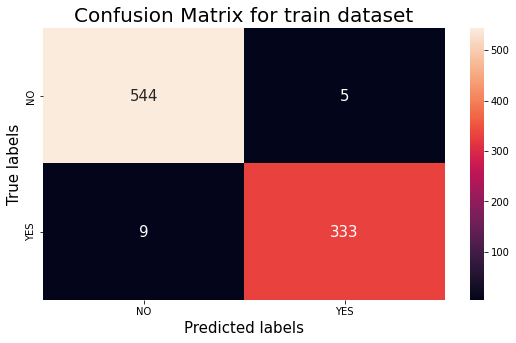

In [136]:
# get confusion matrix for train data
get_confusion_matrix(clf,X_train,y_train,'train')

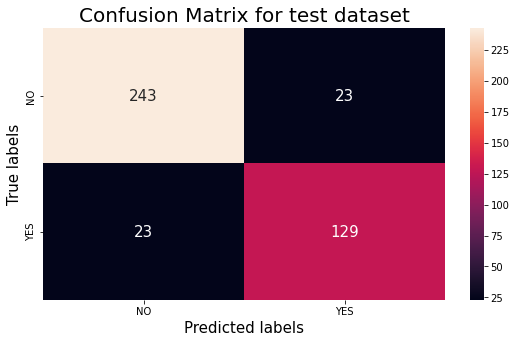

In [137]:
# get confusion matrix for test data
get_confusion_matrix(clf,X_test,y_test,'test')

In [138]:
clf.intercept_

array([-1.38364641])

In [139]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Survived',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [140]:
feature_coefficients(clf,X_train)

,Features,Coef,Absolute coef
0,SibSp,-1.292346,1.292346
1,Pclass,-1.097267,1.097267
2,prefix_Master.,0.989141,0.989141
3,prefix_Mr.,-0.971813,0.971813
4,Sex_female,0.699222,0.699222
...,...,...,...
895,surname_Brandeis,0.000005,0.000005
896,surname_Krekorian,0.000005,0.000005
897,surname_Nesson,0.000005,0.000005
898,surname_Rowe,0.000005,0.000005


In [141]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.979412,0.848684
1,Accuracy,0.984287,0.889952
2,Recall,0.973684,0.848684
3,Precision,0.985207,0.848684
4,log_loss,0.542701,3.800962
5,roc_auc,0.982288,0.881109


It's a poor model 

### WIthout regularization (balanced type)

In [150]:
# Fitting the LogisticRegression on train data
clfb = LogisticRegression(class_weight='balanced')
clfb.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [151]:
# Get the predicted classes
train_class_preds = clfb.predict(X_train)
test_class_preds = clfb.predict(X_test)

In [152]:
# Get score for train and test data
clfb.score(X_train, y_train) , clfb.score(X_test, y_test)

(0.9820426487093153, 0.8851674641148325)

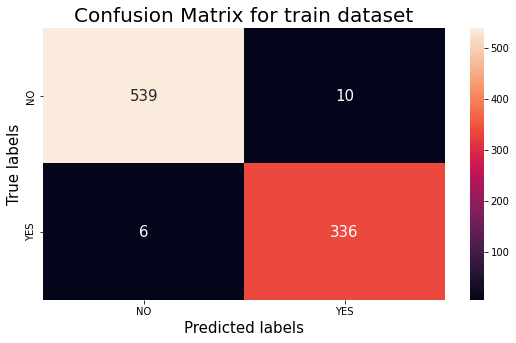

In [153]:
# get confusion matrix for train data
get_confusion_matrix(clfb,X_train,y_train,'train')

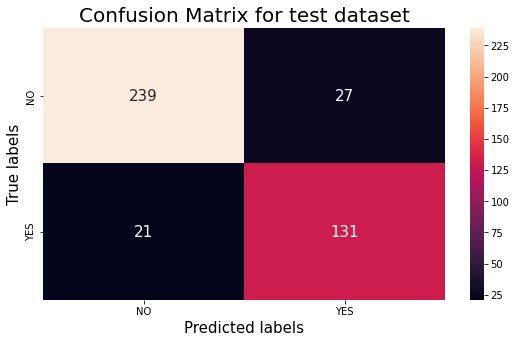

In [154]:
# get confusion matrix for test data
get_confusion_matrix(clfb,X_test,y_test,'test')

In [155]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Survived',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [156]:
feature_coefficients(clfb,X_train)

,Features,Coef,Absolute coef
0,SibSp,-1.319837,1.319837
1,Pclass,-1.115978,1.115978
2,prefix_Master.,0.993194,0.993194
3,prefix_Mr.,-0.963201,0.963201
4,Sex_female,0.692089,0.692089
...,...,...,...
895,surname_O'Donoghue,0.000006,0.000006
896,surname_Fillbrook,0.000006,0.000006
897,surname_O'Keefe,0.000006,0.000006
898,surname_McCrie,0.000006,0.000006


In [157]:
# Get model performance using function I built, model_performance
individual_model_performance(clfb,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.976744,0.845161
1,Accuracy,0.982043,0.885167
2,Recall,0.982456,0.861842
3,Precision,0.971098,0.829114
4,log_loss,0.620234,3.966227
5,roc_auc,0.982121,0.880169


It's a poor model 

## <b><u>K-Nearest Neighbors</b></u>
Advantage : Non parametric, it doesn't learn, it only calculate distances and on basis of majority it will classify. 

Disadvantage : It thinks history repeats itself. 

### Model Training

In [158]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

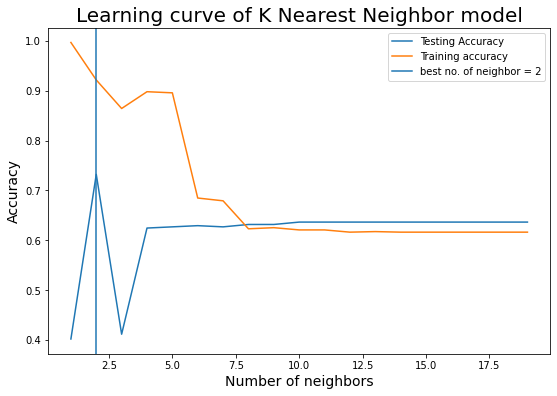

In [159]:
# Generate plot
test_accuracy_list = test_accuracy.tolist()
best_neighbor = test_accuracy_list.index(max(test_accuracy_list)) + 1
plt.figure(figsize=(9,6))

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.axvline(best_neighbor,label = f'best no. of neighbor = {best_neighbor}')

plt.legend()
plt.xlabel('Number of neighbors',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Learning curve of K Nearest Neighbor model',fontsize=20)
plt.show()

In [160]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=best_neighbor)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

###Model Performance

In [161]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [162]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

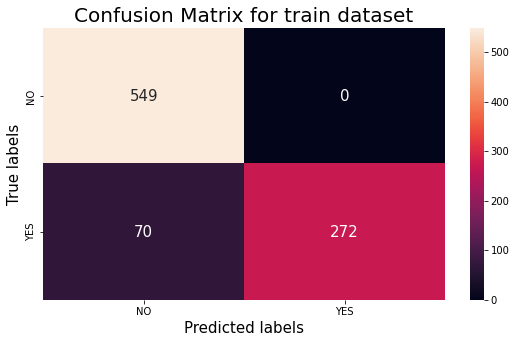

In [163]:
# get confusion matrix for train data
get_confusion_matrix(knn, X_train, y_train, 'train')

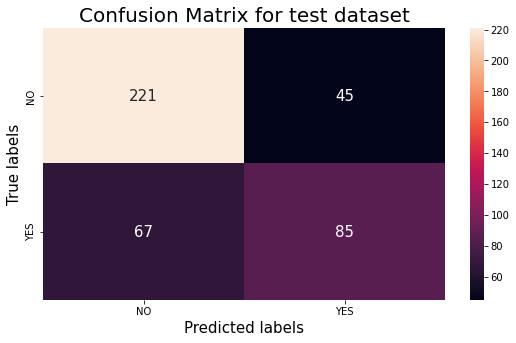

In [164]:
# get confusion matrix for test data
get_confusion_matrix(knn, X_test,y_test,'test')

In [165]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [166]:
# Get model performance using function I built, model_performance
individual_model_performance(knn,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.885993,0.602837
1,Accuracy,0.921437,0.732057
2,Recall,0.795322,0.559211
3,Precision,1.000000,0.653846
4,log_loss,2.713484,9.254495
5,roc_auc,0.897661,0.695019


## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [185]:
# Get a random randomforest model and check the score
rf_model = RandomForestClassifier(max_depth=50, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.9842873176206509, 0.8899521531100478)

In [186]:
# Optimize the hyperparameters using BayesSearch cross-validation
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,20),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=30,
                       cv = 4, scoring='roc_auc')
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Time taken to find optimal parameters using Bayes search is 0.7341716766357422 minutes


In [187]:
# Get the best estimators
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=115)

In [188]:
# Create the optimal random forest model
rf_bayes_optimal = rf_bayes.best_estimator_

### Performance check

In [189]:
# Get the score on train and test data
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.6161616161616161, 0.6363636363636364)

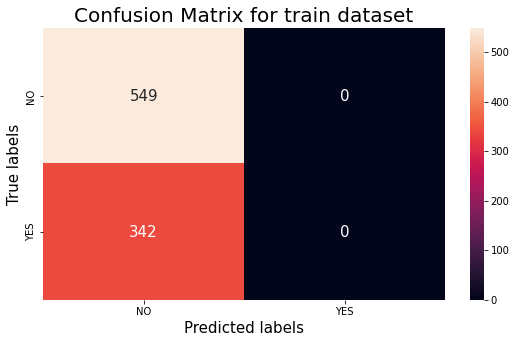

In [190]:
# Get confusion matrix for train data
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

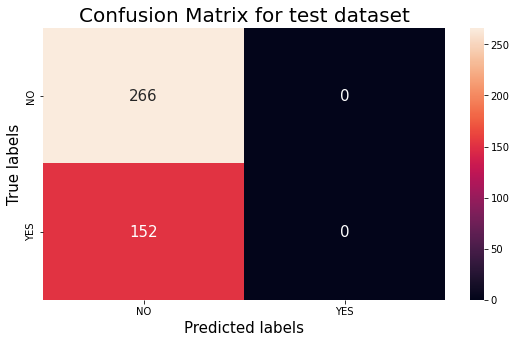

In [191]:
# Get confusion matrix for test data
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [192]:
# Get model performance
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.000000,0.000000
1,Accuracy,0.616162,0.636364
2,Recall,0.000000,0.000000
3,Precision,0.000000,0.000000
4,log_loss,13.257308,12.559555
5,roc_auc,0.500000,0.500000


In [193]:
# Create a function to get feature importance of random forest model
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : X_train.columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [194]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

,Feature,Feature Importance
0,Sex_female,0.154
1,prefix_Mrs.,0.122
2,prefix_Mr.,0.116
3,Fare,0.085
4,Parch,0.078
5,Sex_male,0.068
6,prefix_Miss.,0.067
7,Pclass,0.067
8,is_minor,0.057
9,surname_Rice,0.040


## <b><u>XGBClassifier model

### Training a XGB Classifier

In [177]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=30,
                       cv = 4, scoring='recall')
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Time taken to find optimal parameters using Bayes search is 2.5168119112650555 minutes


In [178]:
# Get best estimators from the cross validation results
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.1, max_depth=20,
              min_samples_weight=0.9197731568829715, reg_alpha=0.1,
              subsample=0.9)

In [179]:
# Create a optmial XGBoost model
xgb_bayes_optimal = xgb_bayes.best_estimator_

### Performance check

In [180]:
# Get the score on both train and test data
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

(0.8956228956228957, 0.8708133971291866)

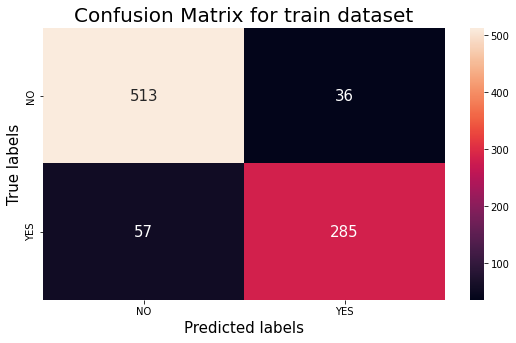

In [181]:
# Get confusion matrix for train data
get_confusion_matrix(xgb_bayes_optimal,X_train,y_train,'train')

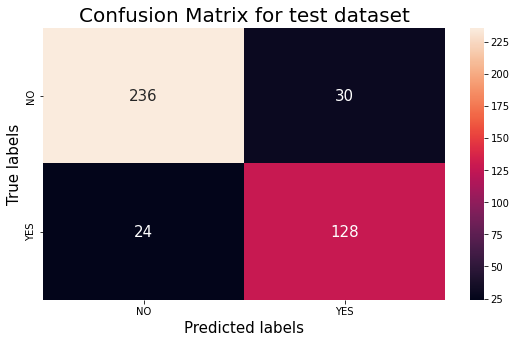

In [182]:
# Get confusion matrix for test data
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [183]:
# Get the model performance
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.859729,0.825806
1,Accuracy,0.895623,0.870813
2,Recall,0.833333,0.842105
3,Precision,0.887850,0.810127
4,log_loss,3.605090,4.462005
5,roc_auc,0.883880,0.864662


In [184]:
# Get feature importances
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

,Feature,Feature Importance
0,prefix_Mr.,0.308
1,surname_Rice,0.090
2,Pclass,0.080
3,Sex_male,0.074
4,Sex_female,0.073
5,prefix_Rev.,0.065
6,surname_Skoog,0.063
7,surname_Sage,0.040
8,surname_Andersson,0.036
9,prefix_Dr.,0.029


## <b><u>Support vector machine model

###SVM model

In [105]:
# import support vector machine classifier algorithm
from sklearn.svm import SVC

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(kernel ='linear',probability=True)

# Bayes search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'degree':(2,10),'C': (0.0001,100),
                                    'gamma': (0.1,1)}, n_iter=20,
                       cv = 3, verbose=2, scoring='accuracy')
# Fit the train data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
# Get the best estimator
svm_bayes.best_estimator_

In [ ]:
# Create a optimal svc model
svm_bayes_optimal = svm_bayes.best_estimator_

In [ ]:
# Get confusion matrix for train data
get_confusion_matrix(svm_bayes_optimal,X_train,y_train,'train')

In [ ]:
# Get confusion matrix for test data
get_confusion_matrix(svm_bayes_optimal,X_test,y_test,'test')

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svm_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svm_bayes_optimal.predict(X_test)))

In [ ]:
# Get feature coefficients
feature_coefficients(svm_bayes_optimal,X_train)

In [ ]:
# Get the model performance
individual_model_performance(svm_bayes_optimal, X_train, X_test, y_train, y_test)

In [ ]:
# Plot the feature importance plot using feature coefficients datframe
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svm_bayes_optimal,X_train))

### Balanced SVM model

In [88]:
# import support vector machine classifier algorithm
from sklearn.svm import SVC

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(class_weight='balanced', kernel ='linear', probability=True )

# Bayes search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'degree':(2,10),'C': (0.0001,100),
                                    'gamma': (0.1,1)}, n_iter=30,
                       cv = 4, verbose=2, scoring='recall')
# Fit the train data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [ ]:
# Get the best estimator
svm_bayes.best_estimator_

In [ ]:
# Create a optimal svc model
svc_bayes_optimal = svm_bayes.best_estimator_

In [ ]:
# Get confusion matrix for train data
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

In [ ]:
# Get confusion matrix for test data
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

In [ ]:
# Get feature coefficients
feature_coefficients(svc_bayes_optimal,X_train)

In [ ]:
# Get the model performance
individual_model_performance(svc_bayes_optimal, X_train, X_test, y_train, y_test)

In [ ]:
# Plot the feature importance plot using feature coefficients datframe
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [195]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get train and test scores for that performance metric
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [196]:
# fill the model list
model_list = [clf,clfb,rf_bayes_optimal, xgb_bayes_optimal]

# fill the model name list
model_name_list = ['Logistic regression model','Balanced LR model','Random forest model', 'XG boosted tress model']

In [197]:
# Get the performance of all the model in tabular format
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

,Model_Name,roc_auc_score,Accuracy_score,Precision_score,Recall_score,log_loss,f_score
0,Logistic regression model,"(0.982, 0.881)","(0.984, 0.89)","(0.985, 0.849)","(0.974, 0.849)","(0.543, 3.801)","(0.979, 0.849)"
1,Balanced LR model,"(0.982, 0.88)","(0.982, 0.885)","(0.971, 0.829)","(0.982, 0.862)","(0.62, 3.966)","(0.977, 0.845)"
2,Random forest model,"(0.5, 0.5)","(0.616, 0.636)","(0.0, 0.0)","(0.0, 0.0)","(13.257, 12.56)","(0.0, 0.0)"
3,XG boosted tress model,"(0.884, 0.865)","(0.896, 0.871)","(0.888, 0.81)","(0.833, 0.842)","(3.605, 4.462)","(0.86, 0.826)"


In [198]:
from sklearn.metrics import plot_confusion_matrix

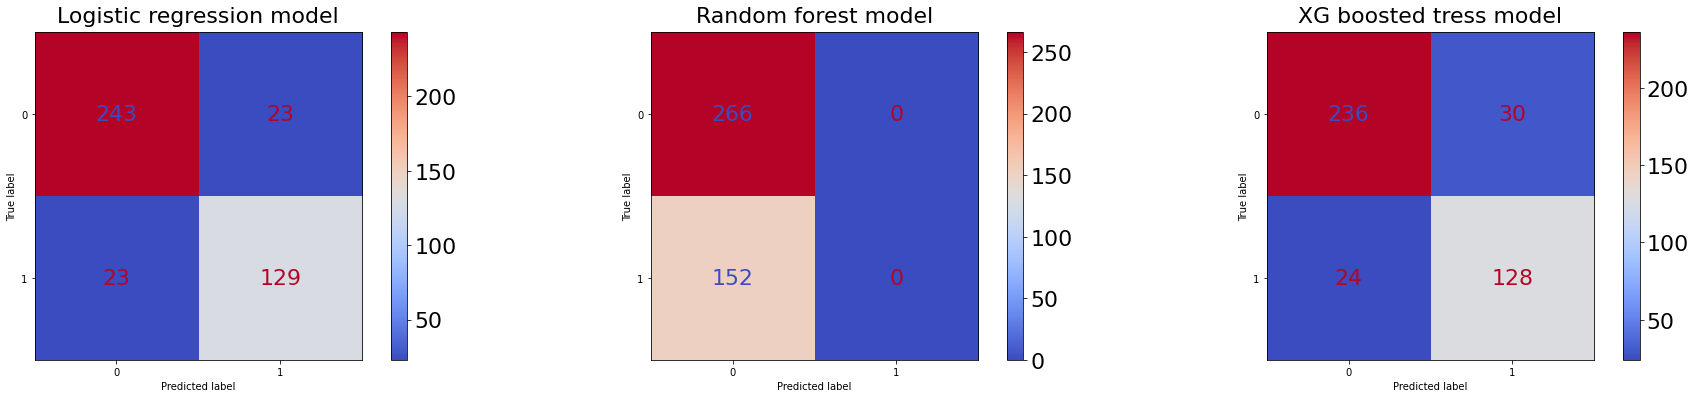

In [199]:
# Compare the models' performance on test dataset
fig, axes = plt.subplots(1,3, figsize=(26,6))
plt.rcParams.update({'font.size': 22})

classifiers = [clf,rf_bayes_optimal, xgb_bayes_optimal]
model_names = ['Logistic regression model','Random forest model', 'XG boosted tress model']
for cls, ax, title in zip(classifiers, axes.flatten(),model_names):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.coolwarm, ax=ax)
    ax.grid(False)
    ax.set_title(title, size=22, pad=10)

plt.tight_layout()
plt.show()

# Submission (Perdiction on test dataset)

In [200]:
clf.predict(X_test)

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [201]:
test_ids = test_df['PassengerId']
test_ids.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [202]:
test_predictions = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': test_predictions})
submission['Survived'] = submission['Survived'].astype('int8') # This is very important, float 0.0 is not same as 0. Due to this, I was getting 0.000 score on Kaggle
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [203]:
submission.shape

(418, 2)

In [204]:
submission.to_csv('submission.csv', index=False)

In [205]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Experiment

In [146]:
ticket = df['Ticket']
list(ticket)

KeyError: ignored

In [ ]:
ticket_port =[]
ticket_number = []

for i in ticket:
  temp = i[::-1]
  temp2 = temp.split()

  if len(temp2)==1:
    try:
      q= int(temp2[0])
      temp2.append(0)
    except:
      temp2.insert(0,0)  

  number = str(temp2[0])[::-1]

  
  port = str(temp2[1])[::-1]
  if len(temp2)>2:
    rest = "".join(temp2[1:])[::-1]
   
  #ticket_number.append( number )
  ticket_port.append(  port+rest)  

set(ticket_port)

In [ ]:
ticket_port_set = set(ticket_port)
real_set = []
for i in ticket_port_set:
  temp = []
  for j in i:
    if j not in ['.','/']:
      temp.append(j)
  joined = ''.join(temp)
  real_set.append(joined.lower())

set(real_set)

In [ ]:
df.head()

In [ ]:
# Use a dictionary and replace function
encoders_nums = {"Sex": {"female":0,"male":1}}

df = df.replace(encoders_nums)  

* Some of the independent features are continuous, discrete, some are nomial, some are ordinal in nature.

* There is no mismatched data 

##o ticket wale functions

In [ ]:
l1 = 'a'
l2 = str()

l1+l2

'a'

In [ ]:
def get_t_port(row):
  ticket_port =[]

  temp = row[::-1]
  temp2 = temp.split()
  if len(temp2)==1:
    try:
      q= int(temp2[0])
      temp2.append(0)
    except:
      temp2.insert(0,0)  

  number = str(temp2[0])[::-1]

  port = str(temp2[1])[::-1]
  rest = str()
  if len(temp2)>2:
    rest = str("".join(temp2[1:])[::-1])

  ticket_port_set = port+rest

  temp = []
  for i in ticket_port_set:
    if i not in ['.','/']:
      temp.append(i)
  joined = ''.join(temp)
    
  return joined.lower()

df['ticket_port'] = df['Ticket'].apply(get_t_port)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,ticket_port
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,a5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,pc
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,stono2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0


In [ ]:
df['ticket_port'].unique()

array(['a5', 'pc', 'stono2', '0', 'pp', 'ca', 'scparis', 'sca4', 'a4',
       'sp', 'soc', 'wc', 'sotonoq', 'wep', '2stono2', 'c', 'sop', 'fa',
       'line', 'fcc', 'swpp', 'scow', 'ppp', 'sc', 'scah', 'as',
       'baslescahbasle', 'sopp', 'fc', 'sotono2', 'casoton', 'sca3',
       'stonoq', 'aq4', '2a2', 'lp', 'aq3'], dtype=object)

In [ ]:
def get_t_num(row):
  ticket_port =[]

  temp = row[::-1]
  temp2 = temp.split()
  if len(temp2)==1:
    try:
      q= int(temp2[0])
      temp2.append(0)
    except:
      temp2.insert(0,0)  

  return str(temp2[0])[::-1]

df['ticket_num'] = df['Ticket'].apply(get_t_num)
df['ticket_num'].astype(int)
df.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prefix,ticket_port,ticket_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,a5,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,pc,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,stono2,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,373450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  prefix       1309 non-null   object 
 13  ticket_port  1309 non-null   object 
 14  ticket_num   1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 163.6+ KB


In [ ]:
# Drop 'Name','Ticket column. Dropping 'Name' column since its redundant. Dropping 'Ticket' since it has lot many categories
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
# Check out the 'Fare' feature when 'Fare' < 10
df[df['Fare']<10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,prefix,ticket_port,ticket_num
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S,Mr.,a5,21171
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S,Miss.,stono2,3101282
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S,Mr.,0,373450
5,6,0.0,3,male,NaN,0,0,8.4583,NaN,Q,Mr.,0,330877
12,13,0.0,3,male,20.0,0,0,8.0500,NaN,S,Mr.,a5,2151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1302,NaN,3,female,NaN,0,0,7.7500,NaN,Q,Miss.,0,365237
412,1304,NaN,3,female,28.0,0,0,7.7750,NaN,S,Miss.,0,347086
413,1305,NaN,3,male,NaN,0,0,8.0500,NaN,S,Mr.,a5,3236
415,1307,NaN,3,male,38.5,0,0,7.2500,NaN,S,Mr.,sotonoq,3101262


In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  prefix       1309 non-null   object 
 11  ticket_port  1309 non-null   object 
 12  ticket_num   1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [ ]:
df =df.drop('PassengerId',axis=1)



> Data has some null values.



In [ ]:
# Describe the features
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

Survived : [ 0.  1. nan]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Pclass : [3 1 2]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Sex : ['male' 'female']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Age : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

###Imputing values

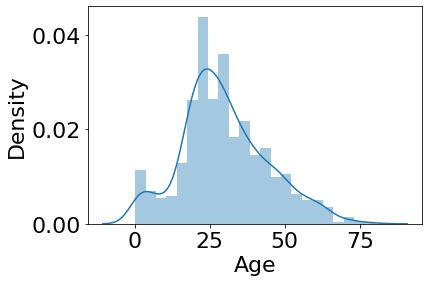

In [ ]:
# Check 'Age' distribution
sns.distplot(df['Age'])

In [ ]:
df['Age'].mean(),df['Age'].median()

(29.881137667304014, 28.0)

In [ ]:
# Fill na values in 'Age' feature with 30 which is close to median value
df['Age'].fillna(30,inplace=True)

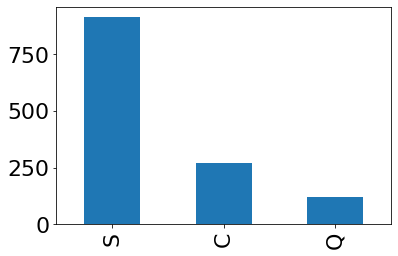

In [ ]:
# Get 'Embarked' feature distribution
count = df['Embarked'].value_counts()
count.plot.bar()

In [ ]:
# Filling na values in 'Embarked' by 'S' which is mode()
df['Embarked'].fillna('S',inplace=True)

In [ ]:
# Change cabin_num to integer type
df['Cabin_num'] = df['Cabin_num'].astype('int32')

In [ ]:
# Check the Fare when Fare is null
df[df['Fare'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prefix,ticket_port,ticket_num,Cabin_num,Cabin_class
152,NaN,3,male,60.5,0,0,NaN,S,Mr.,0,3701,0,np


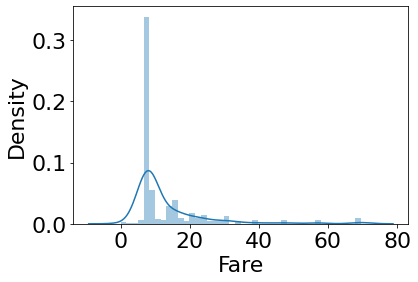

In [ ]:
# Plot Fare distribution
sns.distplot(df[df['Pclass']==3]['Fare'])

In [ ]:
# Check out mean and median values
df[df['Pclass']==3]['Fare'].median(), df[df['Pclass']==3]['Fare'].mean()

(8.05, 13.302888700564969)

In [ ]:
# Impute the median() value in 'Fare', inplace of nan value
df['Fare'].fillna(8.05,inplace=True)

In [ ]:
# Check the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked     1309 non-null   object 
 8   prefix       1309 non-null   object 
 9   ticket_port  1309 non-null   object 
 10  ticket_num   1309 non-null   object 
 11  Cabin_num    1309 non-null   int32  
 12  Cabin_class  1309 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 138.1+ KB


## the feature selection method randomforest feature importance

In [ ]:
def randomforest_embedded(x,y):
  from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  return final_df

In [ ]:
imp= randomforest_embedded(X_train,y_train)

imp_feat = imp[imp['Importances']>=0.0001]['Features'].tolist()

In [ ]:
# Train-test split
X_train = X_train[imp_feat]
X_test = X_test[imp_feat]

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(891, 61) (891,)
(418, 61) (418,)
